In [23]:
import pandas as pd
from glob import glob
import uproot4 as uproot
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplhep as hep
hep.style.use("CMS")

In [24]:
file = "8675.root"  
# file0 = "/home/nkarunar/hit_root_files/8997_0.root"  
# file1 = "/home/nkarunar/hit_root_files/8997_1.root"
# file2 = "/home/nkarunar/hit_root_files/8997_2.root"

In [25]:
file

'8675.root'

In [26]:
tree = uproot.open(f'{file}:T')
# tree0 = uproot.open(f'{file0}:T')
# tree1 = uproot.open(f'{file1}:T')
# tree2 = uproot.open(f'{file2}:T')

# nentries = tree.num_entries

In [27]:
tree

<TTree 'T' (10 branches) at 0x7f0fd26405e0>

In [28]:
# tree0.num_entries, tree1.num_entries, tree2.num_entries

In [29]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
hits                 | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
timesec              | int32_t                  | AsDtype('>i4')
timemsec             | int32_t                  | AsDtype('>i4')
bx                   | int32_t                  | AsDtype('>i4')
channel              | int32_t[]                | AsJagged(AsDtype('>i4'))
roc                  | int32_t[]                | AsJagged(AsDtype('>i4'))
row                  | int32_t[]                | AsJagged(AsDtype('>i4'))
col                  | int32_t[]                | AsJagged(AsDtype('>i4'))
pulseHeight          | int32_t[]                | AsJagged(AsDtype('>i4'))


In [30]:
bxt = tree.arrays(["timesec", "bx"], library="pd")
# bxt0 = tree0.arrays(["timesec", "bx"], library="pd")
# bxt1 = tree1.arrays(["timesec", "bx"], library="pd")
# bxt2 = tree2.arrays(["timesec", "bx"], library="pd")

/home/nimmitha/miniconda3/envs/work/lib/python3.9/site-packages/uproot4/interpretation/library.py:659: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


In [70]:
# concatenate
# bxt = pd.concat([bxt0, bxt1, bxt2])
bxt = pd.concat([bxt1, bxt2])

In [31]:
bxt.sort_values(by=['timesec'], inplace=True)

In [72]:
# bxt = pd.read_csv("bx.csv")

In [32]:
bxt
# convert timesec to datetime
bxt['newtime'] = pd.to_datetime(bxt['timesec'], unit='s')

# add 1 to bx
bxt['bx'] = bxt['bx'] + 1


In [33]:
bxt

,timesec,bx,newtime
0,1682625027,1281,2023-04-27 19:50:27
105,1682625027,2014,2023-04-27 19:50:27
106,1682625027,1608,2023-04-27 19:50:27
107,1682625027,390,2023-04-27 19:50:27
108,1682625027,1157,2023-04-27 19:50:27
...,...,...,...
9015288,1682644139,236,2023-04-28 01:08:59
9015287,1682644139,2221,2023-04-28 01:08:59
9015286,1682644139,3033,2023-04-28 01:08:59
9015374,1682644139,244,2023-04-28 01:08:59


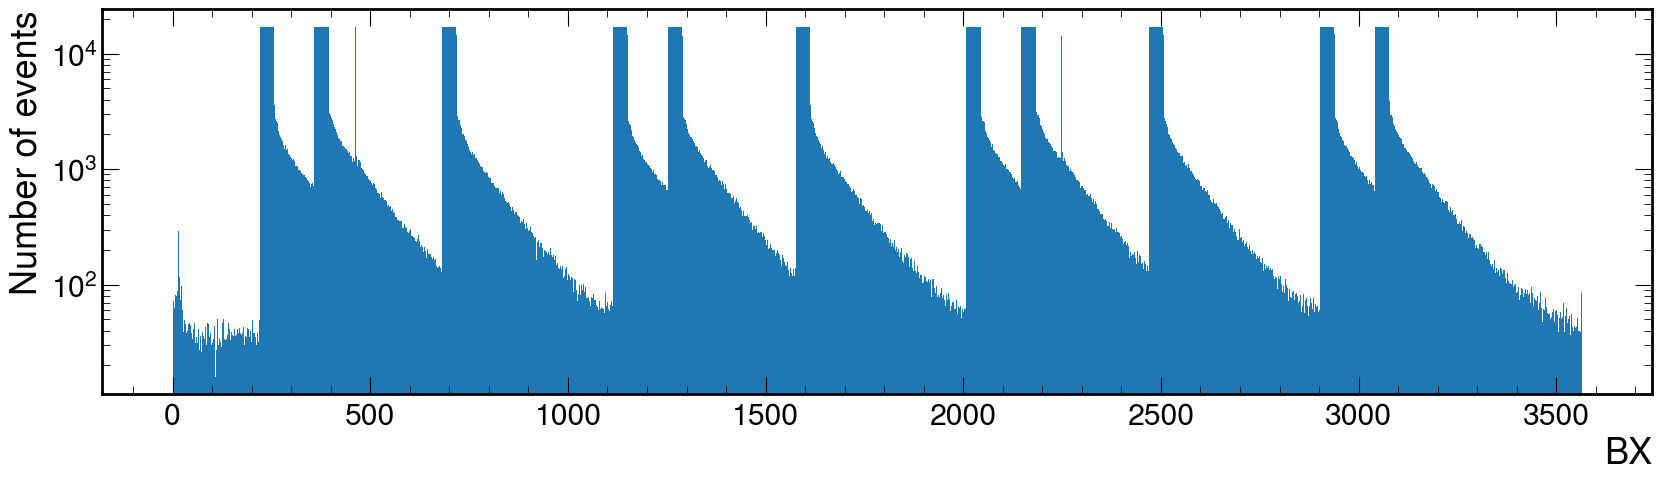

In [35]:
plt.figure(figsize=(20, 5))
plt.hist(bxt.bx, bins=3564, range=(0, 3564))
plt.xlabel("BX")
plt.ylabel("Number of events")
# plt.xlim(100, 110)
plt.yscale("log")


In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

date_format = mdates.DateFormatter('%H:%M:%S')

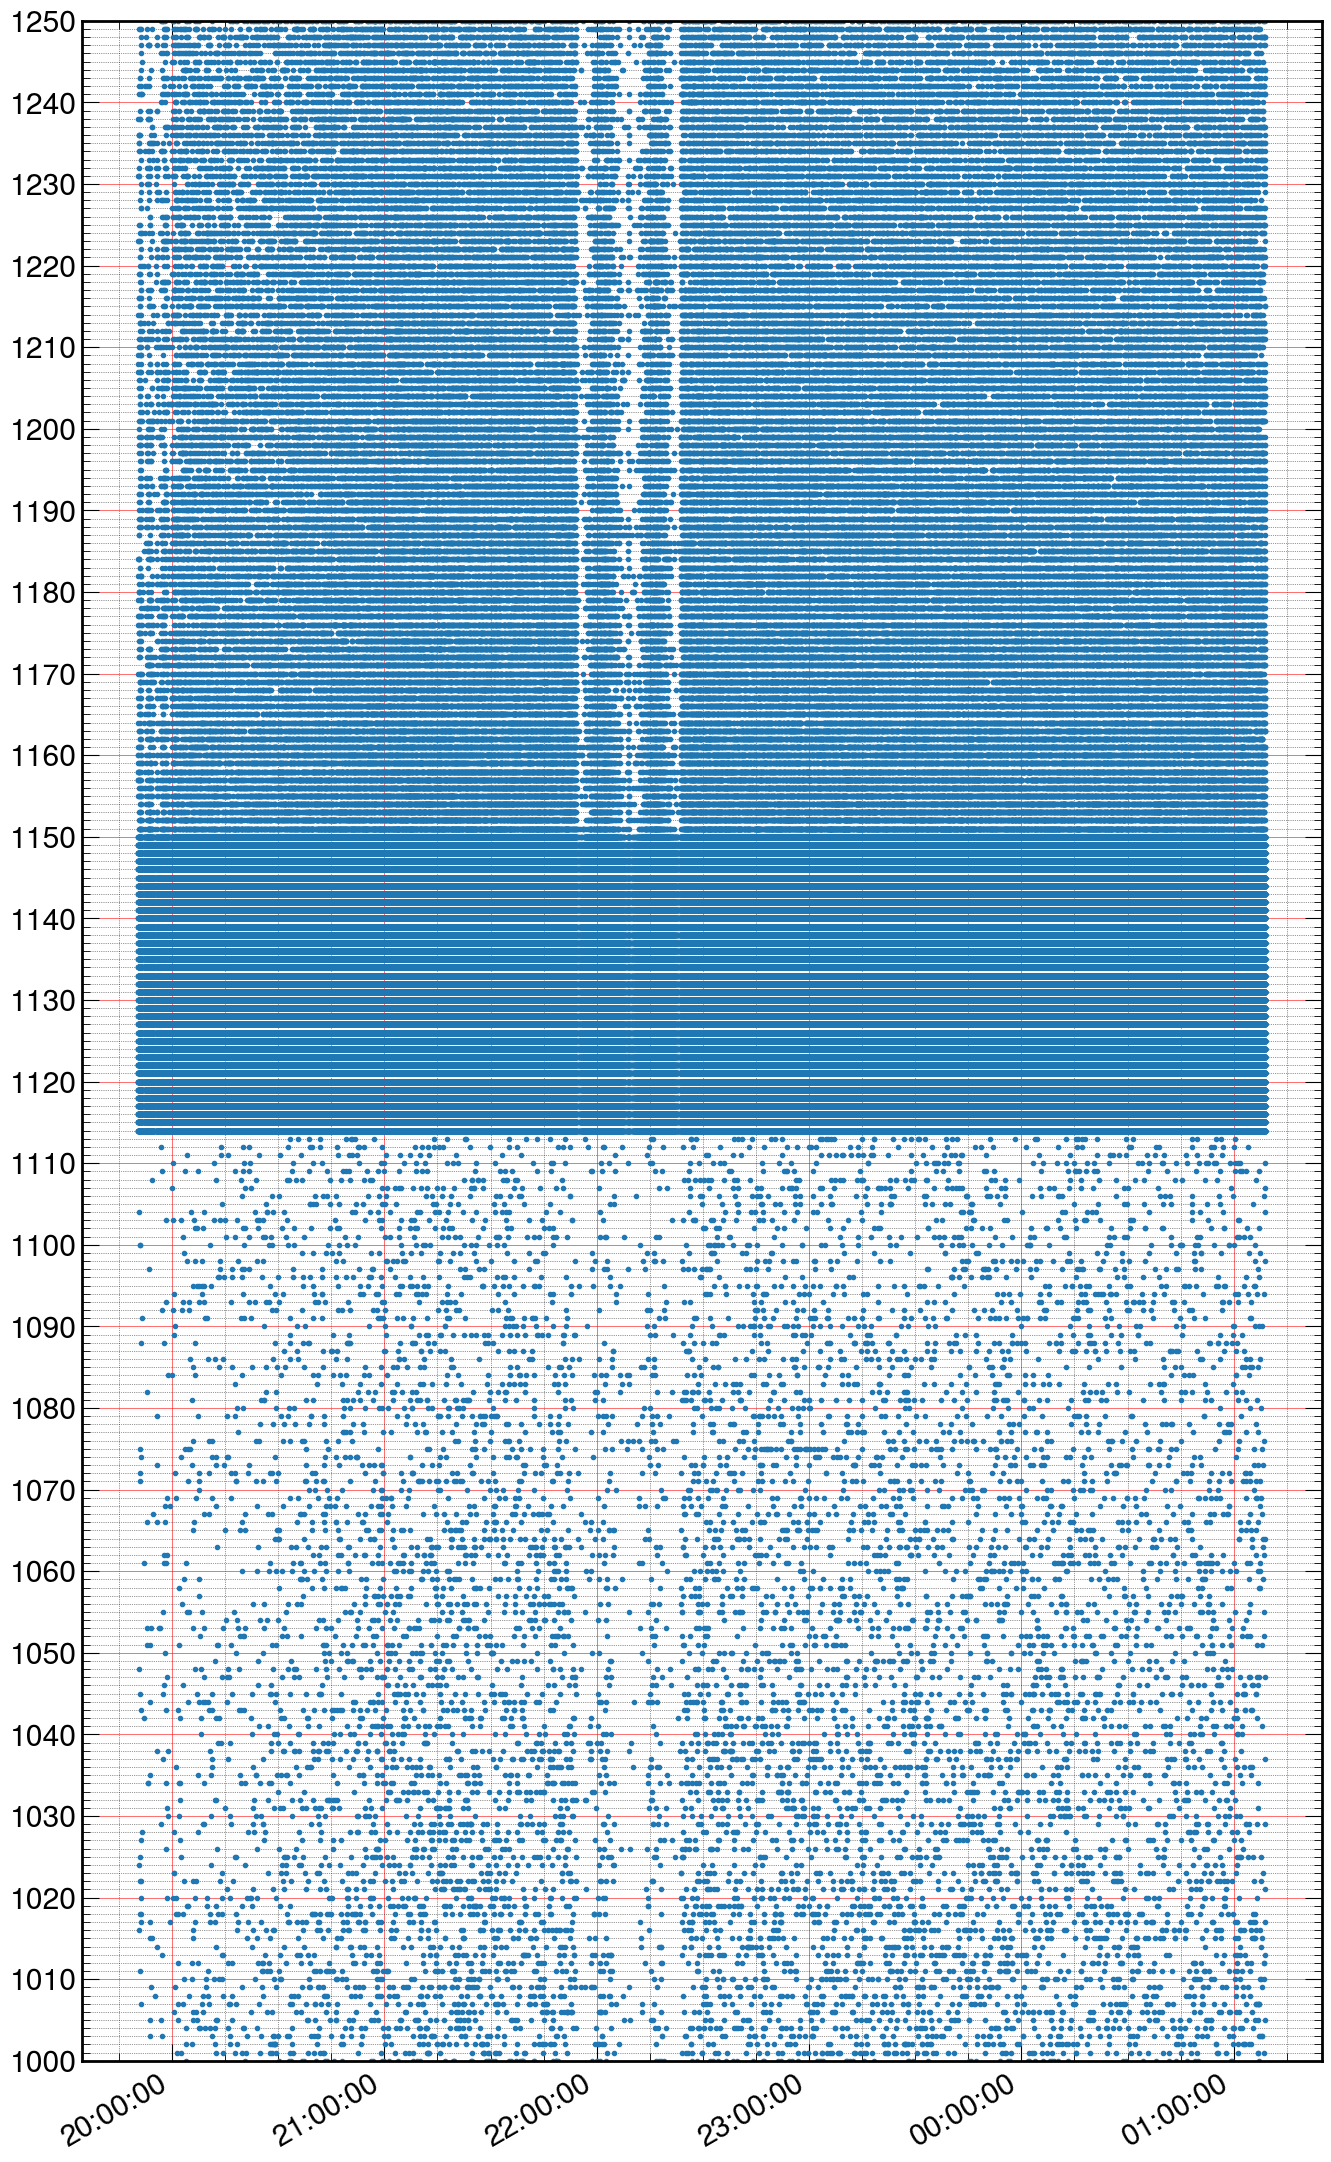

In [37]:
fig, ax = plt.subplots(figsize=(16, 30))
ax.plot(bxt['newtime'], bxt.bx, '.')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.ylim(1000, 1250)

# turn on minor ticks
ax.minorticks_on()
# set major and minor ticks

# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))


# grid for major axis and minor axis on both x and y axis
ax.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='black')
# y axis minor tick labels

plt.savefig('test2.png', dpi=600)
plt.show()

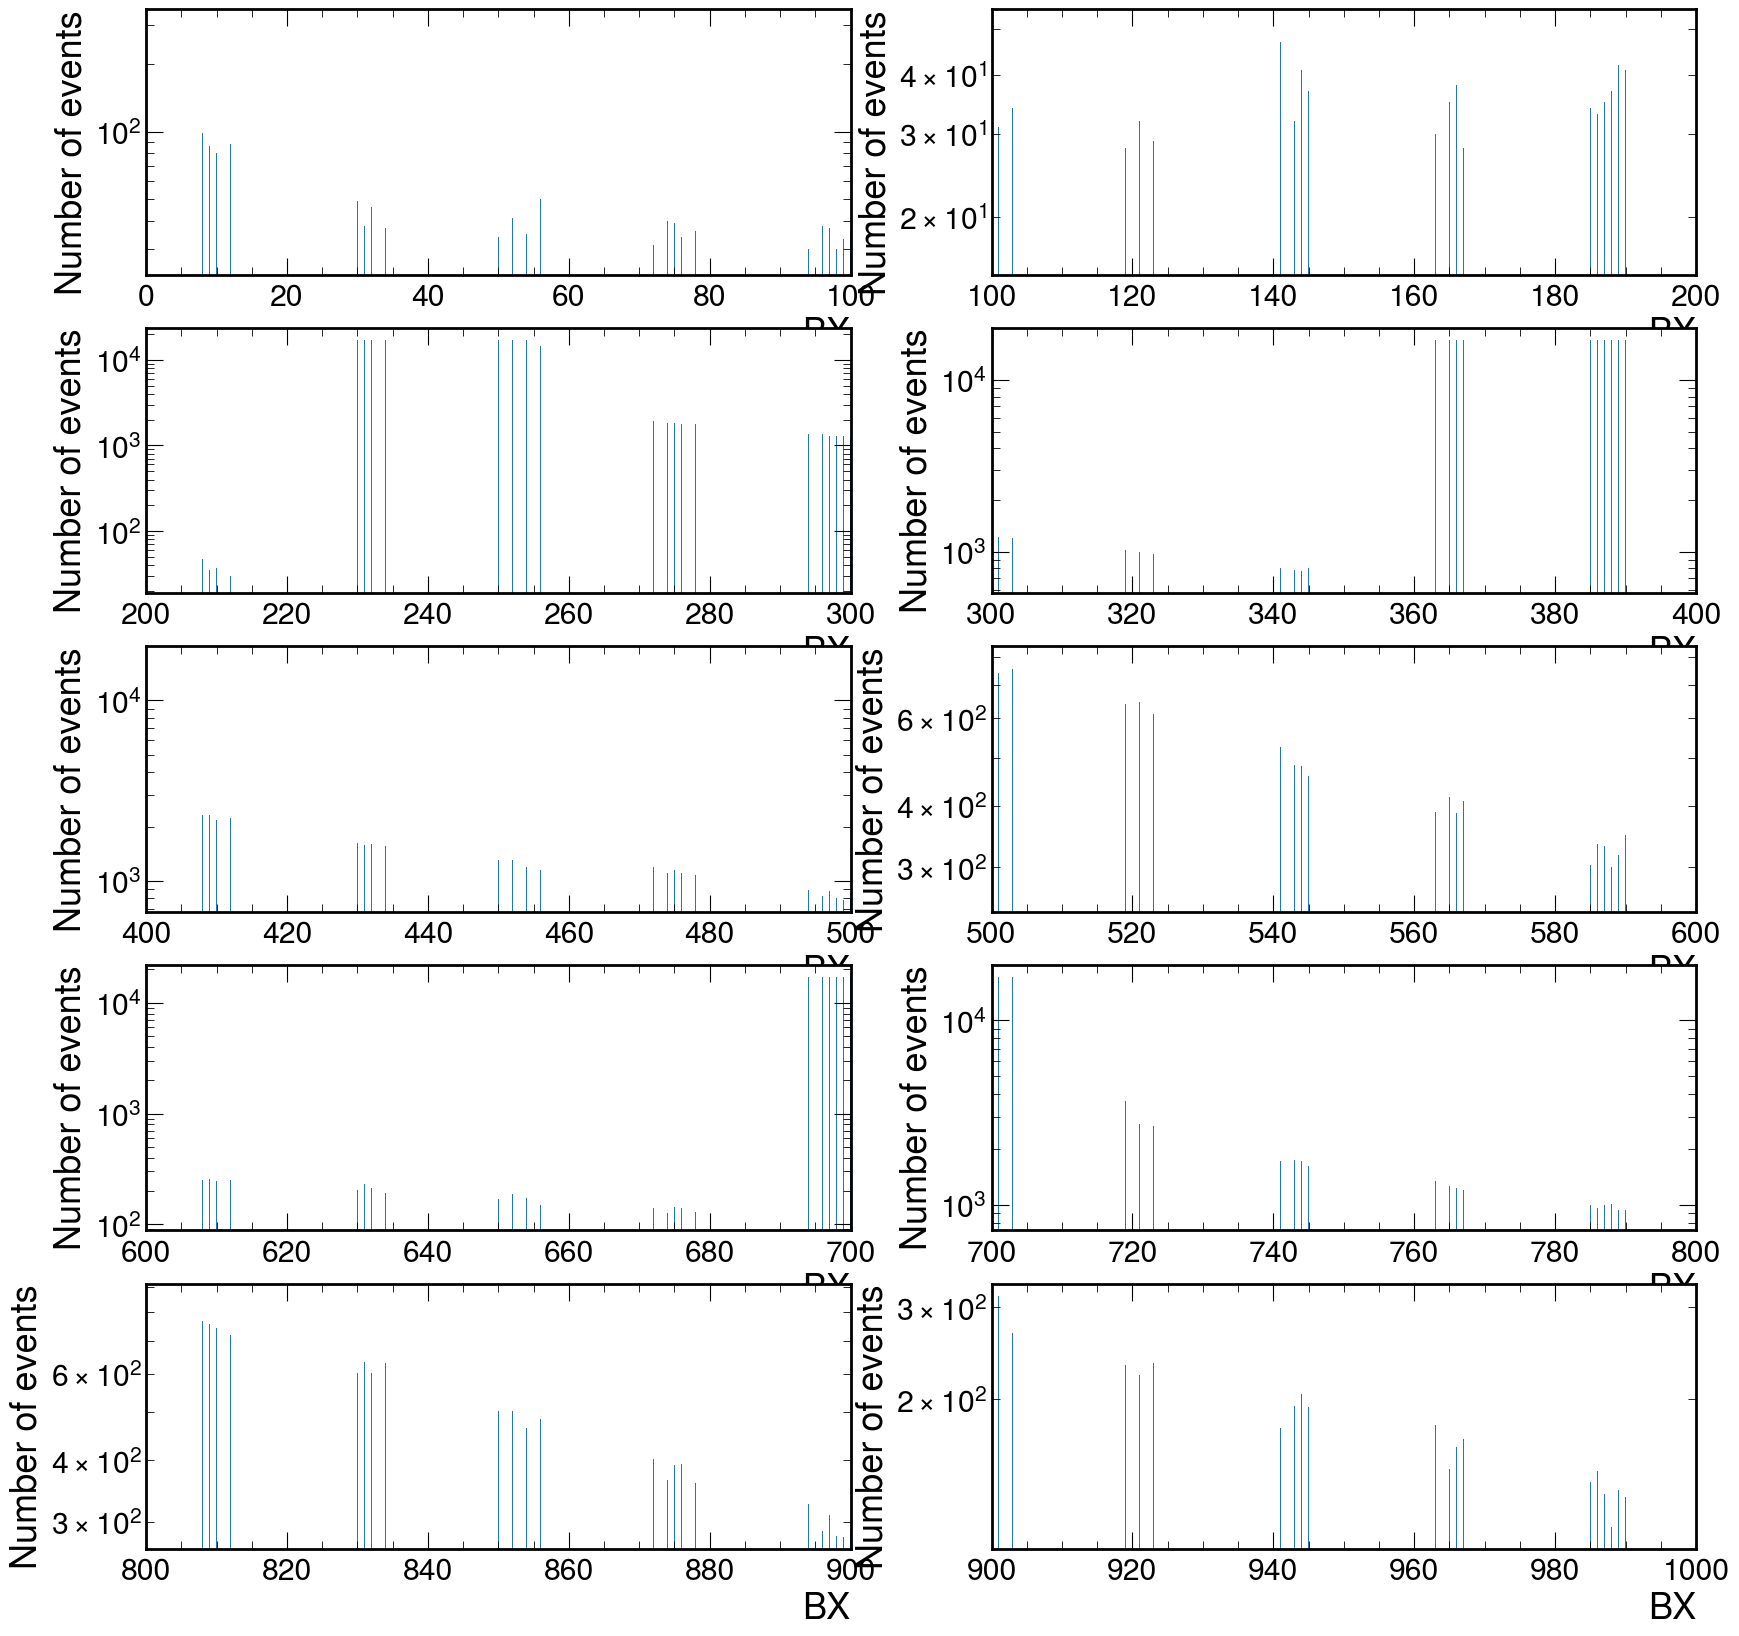

In [38]:
# histogram y range in multiple plots. each plot has a range 100
plt.figure(figsize=(20, 20))

for i in range(0, 10):
    plt.subplot(5, 2, i+1)
    plt.hist(bxt.bx, bins=3564, range=(i*100, (i+1)*100))
    plt.xlabel("BX")
    plt.ylabel("Number of events")
    plt.xlim(i*100, (i+1)*100)
    plt.yscale("log")

In [40]:
bxt = tree.arrays(["timesec", "bx", 'event', 'channel', 'roc', 'row', 'col'], library="pd", entry_start=0, entry_stop=1000)

/home/nimmitha/miniconda3/envs/work/lib/python3.9/site-packages/uproot4/interpretation/library.py:659: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


In [45]:
a = bxt.groupby(['event', 'bx', 'channel']).size().reset_index(name='counts')

In [47]:
bxt

timesec    bx   event  channel  roc  row  col
entry subentry                                                  
0     0         1682625027  1280  970113        1    1   56   18
      1         1682625027  1280  970113        1    2   53   24
      2         1682625027  1280  970113        7    1   57   19
      3         1682625027  1280  970113       13    0   28   19
      4         1682625027  1280  970113       13    2   42   26
...                    ...   ...     ...      ...  ...  ...  ...
999   0         1682625029   247  977606       11    2   22   18
      1         1682625029   247  977606       11    2   23   18
      2         1682625029   247  977606       17    1   43   18
      3         1682625029   247  977606       19    2   41   36
      4         1682625029   247  977606       22    1   49   26

[16533 rows x 7 columns]

In [44]:
a.to_csv("a.csv")